In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [2]:
#load the dataset
iris = load_iris()
df = pd.DataFrame(
    data = iris.data,
    columns = iris.feature_names
)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
#map target number to names
df['species'] = df['species'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


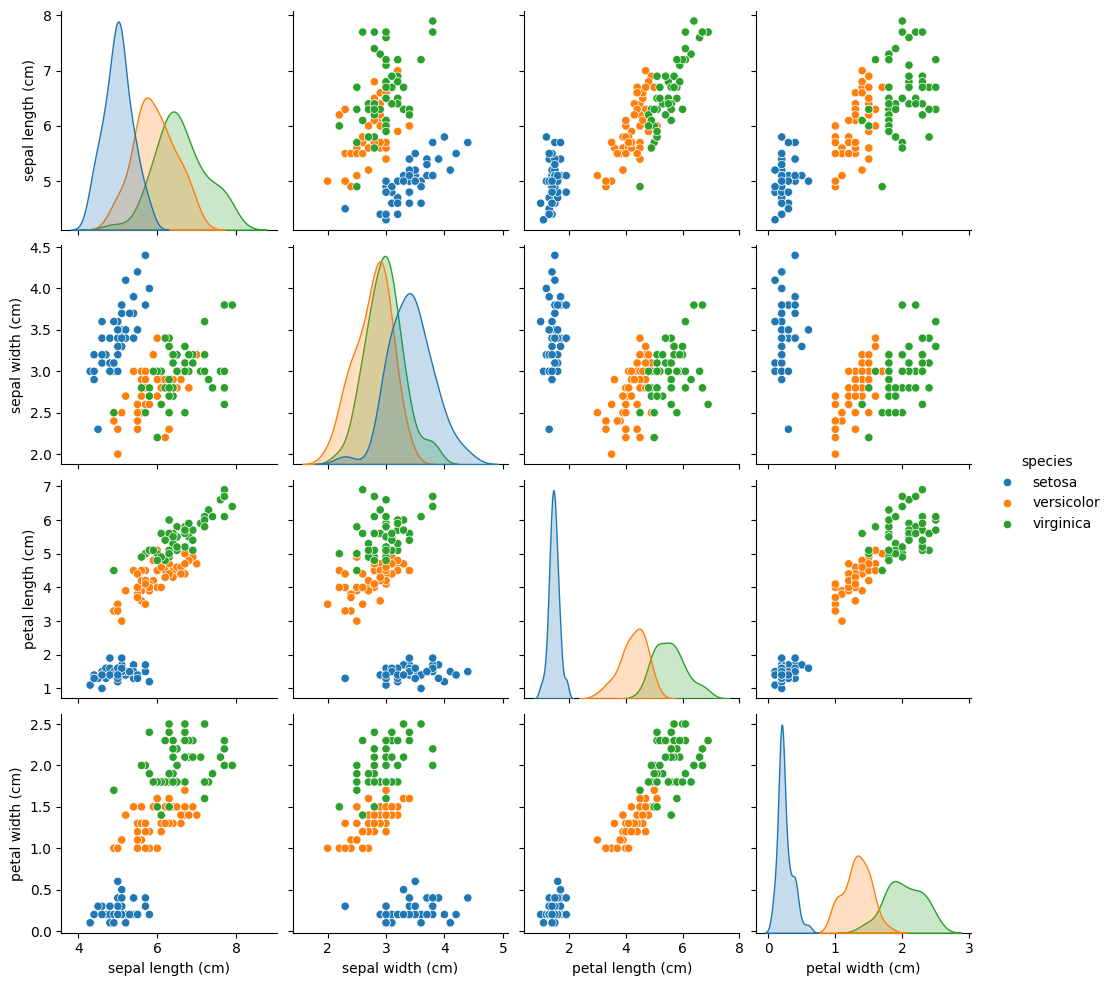

In [6]:
#EDA
sns.pairplot(df, hue='species')
plt.show()

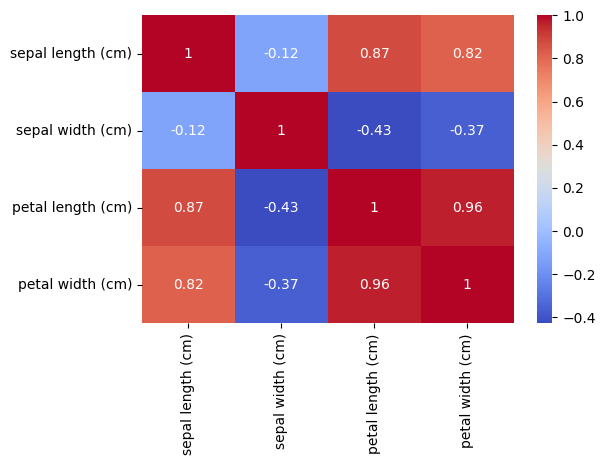

In [7]:
#correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
#train-test split
X = df.drop('species', axis=1)
y = df['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [10]:
#Multi-model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

accuracy_scores = {}

for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.4f}")


Decision Tree: 1.0000
Logistic Regression: 1.0000
KNN: 1.0000
SVM: 1.0000
Random Forest: 1.0000


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#Display results in a sorted DataFrame
results_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['accuracy'])
print(results_df.sort_values(by='accuracy', ascending=False))


                     accuracy
Decision Tree             1.0
Logistic Regression       1.0
KNN                       1.0
SVM                       1.0
Random Forest             1.0


In [12]:
#selecting the best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print("\nBest Model Selected:", best_model_name)



Best Model Selected: Decision Tree


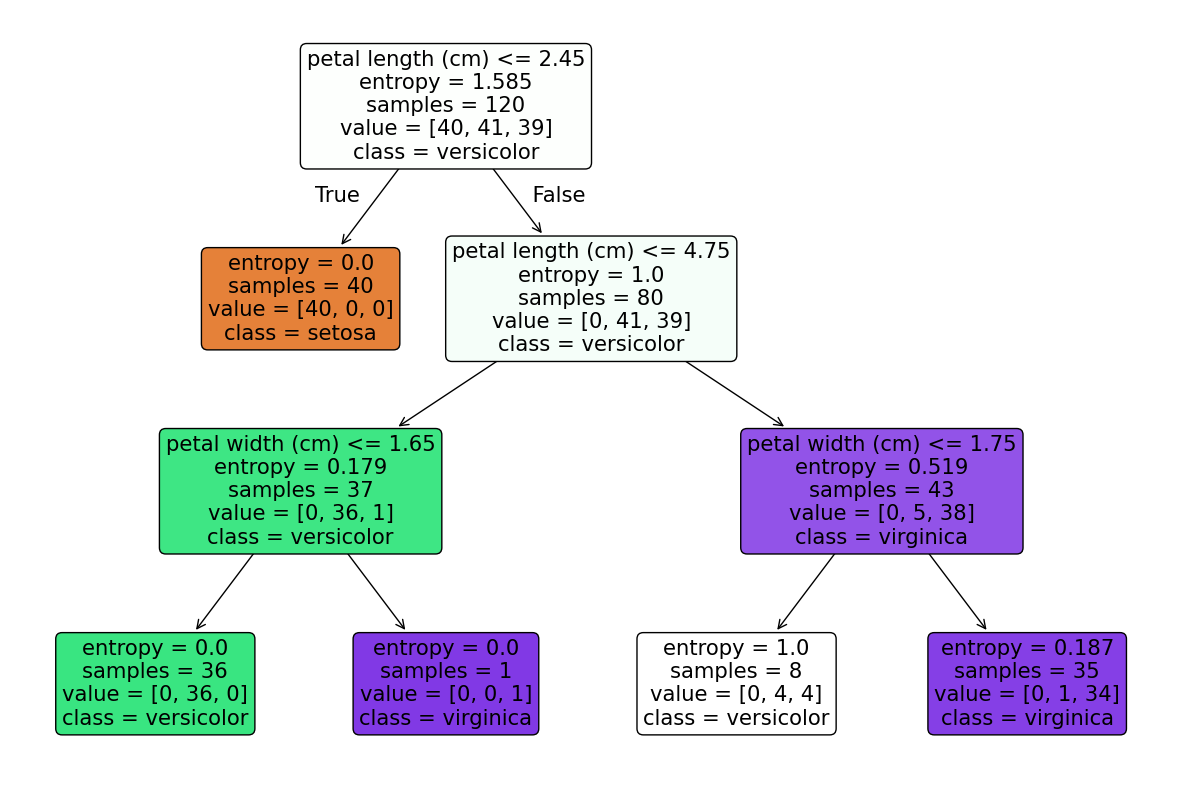

In [14]:
#Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(
    models["Decision Tree"],
    feature_names=X.columns,
    class_names=models["Decision Tree"].classes_,
    filled=True,
    rounded=True
)
plt.show()


In [ ]:
#testing with a custom input
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
prediction = best_model.predict(sample)
prediction

array(['setosa'], dtype=object)